# Name :- Rishabh Sharma
# Registration Number :- 20MAI0082
# DA-1

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests
from warnings import filterwarnings
filterwarnings("ignore")

### Using Web Scraping to collect the data

In [2]:
while True:
    try:
        link = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
        print(link)
        page = requests.get(link)
        print(page)
        break
    except:
        pass

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off
<Response [200]>


In [3]:
soup = bs(page.content,'html.parser')

In [4]:
# items = soup.find_all('div',class_="_4rR01T")
# items=[i.get_text() for i in items]
# items = [i.split(" - (")[0] for i in items]

In [5]:
details = soup.find_all("li",class_="rgWa7D")
details = [i.get_text() for i in details]

In [6]:
lis,newlis=[],[]
for i in details:
    if ("Intel ")in i or ("AMD ") in i or ("M1") in i :
        if newlis:
            lis.append(newlis)
            newlis=[]
            newlis.append(i)
        else:
            newlis.append(i)
    else:
        newlis.append(i)
newlisnew=[]
for i in lis:
    newlisnew.append(" ".join(i))

In [7]:
items = []
for i in newlisnew:
    if ' GB DDR4' in i:
         items.append(i.split(" GB DDR4")[0][:-2])
    elif ' GB DDR3' in i:
        items.append(i.split(" GB DDR3")[0][:-2] )
    elif ' GB LPDDR4X' in i:
        items.append(i.split(" GB LPDDR4X")[0][:-2] )
    else:
        items.append("")
company = [i.split()[0] for i in items]

In [8]:
pages= soup.find_all('a',class_='ge-49M',href=True)
pages = [str(i).split(">")[0][31:] for i in pages ]

In [9]:
ratings = soup.find_all("div",class_='_3LWZlK')
ratings = [i.get_text() for i in ratings]

In [10]:
prices =  soup.find_all("div",class_="_30jeq3 _1_WHN1")
prices = [i.get_text().replace("₹","").replace(",","") for i in prices]

In [11]:
# details = soup.find_all("li",class_="rgWa7D")
# details = [i.get_text() for i in details]

In [12]:
# indepth_link = soup.find_all("a",class_ = '_1fQZEK')

In [13]:
# start= str(indepth_link[0]).index("href=")
# end = str(indepth_link[0]).index(" rel=")
# links = ['https://www.flipkart.com'+str(str(i)[start+6:end-1]) for i in indepth_link]

In [14]:
lis,newlis=[],[]
for i in details:
    if ("Intel ")in i or ("AMD ") in i or ("M1") in i :
        if newlis:
            lis.append(newlis)
            newlis=[]
            newlis.append(i)
        else:
            newlis.append(i)
    else:
        newlis.append(i)
newlisnew=[]
for i in lis:
    newlisnew.append(" ".join(i))

### Collecting data and filtering everything

In [15]:
processor_brand=[]
processor = []
ram = []
ram_type=[]
os =[]
screen_size=[]
ssd_present=[]
ssd_capacity=[]
hdd_capacity=[]
# count=0
for i in newlisnew:
    if "Intel " in i:
#         print(count)
        processor_brand.append("Intel")
        processor.append(i.split()[1]+" "+i.split()[2])
    elif 'AMD' in i:
#         print(count)
        processor_brand.append("AMD")
        processor.append(i.split()[1]+" "+i.split()[2])
    elif "M1" in i:
#         print(count)
        processor_brand.append("M1")
        processor.append(i.split()[1]+" "+i.split()[2])
    else:
        processor_brand.append("")
        processor.append("")
#     count+=1
    if ' GB DDR4 RAM' in i:
        index = i.index(' GB DDR4 RAM')
        ram.append(i[index-2:index])
        ram_type.append("DDR4")
    elif  ' GB DDR3' in i:
        index = i.index(' GB DDR3 RAM')
        ram.append(i[index-2:index])
        ram_type.append("DDR3")
    else:
        ram.append("")
    if ' Operating System' in i:
        a = i.split()
        index = a.index("Operating")
        if a[index-1]=="10":
                os.append("Windows 10")
        elif a[index-2]=='Mac':
            os.append("Mac Os")
        else:
            os.append(a[index-1])
    else:
        os.append("")
    if "inch" in i:
        a = i.split()
        if 'inches)' in a:
            index = a.index("inches)")
        else:
            index = a.index("inch)")
        screen_size.append(a[index-1].strip("(")+" inch")
    if (" GB SSD" in i) or (" TB SSD" in i):
        ssd_present.append("Yes")
        if " GB SSD" in i:
            start = i.index(" GB SSD")-3
            end=i.index(" GB SSD")
            ssd_capacity.append(i[start:end])
        elif' TB SSD' in i:
            index = i.index(" TB SSD")
            ssd_capacity.append(int(i[index-1])*1024)
    else:
        ssd_present.append("No")
        ssd_capacity.append("")
    if " HDD" in i:
        index = i.index(" HDD")
        hdd_capacity.append(i[index-4])
    else:
        hdd_capacity.append("")

### Creating a dataframe in order to carry out further steps

In [16]:
data = pd.DataFrame({
'items':items[:len(processor)],                                       # Name of Laptop
'company':company[:len(processor)],                              # Company of laptop  (or Laptop belongs to which company)                       (Categorical)
'ratings out of 5':ratings[:len(processor)],                     # What are the rating mentioned overall to the device  (continous)
'prices':prices[:len(processor)],                                     # Price of the laptop                                                       (continous)
'processor_brand':processor_brand,                             # what is the processor of the laptop this will be categorical as Intel or AMD (Categorical)
'processor':processor,                                                   # Type of processor of the laptop (Categorical)
'ram':ram ,                                                                     # how much ram does it have (Categorical)
'ram_type':ram_type,                                                    # what is the type of ram (Categorical)
'operating_system' :os,                                                  # consist of which operating system by default (Categorical)
'screen_size':screen_size,                                             # Screen-size of the laptop (Categorical)
'ssd_present':ssd_present,                                            # is SSD present in the laptop (Categorical)
'ssd_capacity':ssd_capacity,                                          # What is the capacity of the SSD (continous)
'hdd_capacity_in_TB':hdd_capacity,                              # What is the capacity of HDD (Categorical)
'Purchased': [np.random.choice(["No","Yes"]) for i in range(0,len(processor))]})   # this is generated randomly whether the customer will buy a laptop or not.
data.to_csv("Dataset.csv",index=False)                                                                    # Storing data into csv file

In [17]:
data.shape

(23, 14)

In [18]:
data =data.replace("",np.nan)

In [19]:
data.head()

,items,company,ratings out of 5,prices,processor_brand,processor,ram,ram_type,operating_system,screen_size,ssd_present,ssd_capacity,hdd_capacity_in_TB,Purchased
0,AMD Ryzen 5 Quad Core Processor (3rd Gen),AMD,4.4,48990,AMD,Ryzen 5,8,DDR4,Windows 10,14 inch,Yes,256,1,Yes
1,Intel Core i3 Processor (10th Gen),Intel,4,35990,Intel,Core i3,8,DDR4,Windows 10,15.6 inch,Yes,256,NaN,No
2,Intel Core i5 Processor (9th Gen),Intel,4.5,52990,Intel,Core i5,8,DDR4,Windows 10,15.6 inch,Yes,512,NaN,No
3,Intel Core i3 Processor (10th Gen),Intel,4.2,33490,Intel,Core i3,4,DDR4,Windows 10,15.6 inch,Yes,256,NaN,Yes
4,Intel Core i3 Processor (10th Gen),Intel,4.2,35990,Intel,Core i3,8,DDR4,Windows 10,14 inch,Yes,256,NaN,No


In [20]:
data.isnull().sum()

items                  0
company                0
ratings out of 5       0
prices                 0
processor_brand        0
processor              0
ram                    0
ram_type               0
operating_system       0
screen_size            0
ssd_present            0
ssd_capacity           4
hdd_capacity_in_TB    14
Purchased              0
dtype: int64

### Filling null values

In [21]:
data = data.replace(np.nan,0)
data.head()

,items,company,ratings out of 5,prices,processor_brand,processor,ram,ram_type,operating_system,screen_size,ssd_present,ssd_capacity,hdd_capacity_in_TB,Purchased
0,AMD Ryzen 5 Quad Core Processor (3rd Gen),AMD,4.4,48990,AMD,Ryzen 5,8,DDR4,Windows 10,14 inch,Yes,256,1,Yes
1,Intel Core i3 Processor (10th Gen),Intel,4,35990,Intel,Core i3,8,DDR4,Windows 10,15.6 inch,Yes,256,0,No
2,Intel Core i5 Processor (9th Gen),Intel,4.5,52990,Intel,Core i5,8,DDR4,Windows 10,15.6 inch,Yes,512,0,No
3,Intel Core i3 Processor (10th Gen),Intel,4.2,33490,Intel,Core i3,4,DDR4,Windows 10,15.6 inch,Yes,256,0,Yes
4,Intel Core i3 Processor (10th Gen),Intel,4.2,35990,Intel,Core i3,8,DDR4,Windows 10,14 inch,Yes,256,0,No


### Using train test split and selecting features

In [22]:
from sklearn.model_selection import train_test_split
x = data.drop(["items",'Purchased'],axis=1)
y = data[["Purchased"]]

### Transforming string to numeric

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["company"] = le.fit_transform(x["company"])
x["processor_brand"] = le.fit_transform(x["processor_brand"])
x["processor"] = le.fit_transform(x["processor"])
x["ram_type"] = le.fit_transform(x["ram_type"])
x["operating_system"] = le.fit_transform(x["operating_system"])
x["screen_size"] = le.fit_transform(x["screen_size"])
x["ssd_present"] = le.fit_transform(x["ssd_present"])
y["Purchased"] = le.fit_transform(y["Purchased"])

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True,test_size=0.1)

### Using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
predictions = lr.predict(xtest)

In [26]:
predictions

array([0, 1, 1])

### Using Confusion Matrix and accuracy score to find how much better the algorithm performs

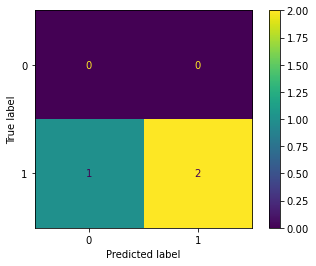

In [27]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
plot_confusion_matrix(lr,xtest,ytest)

In [28]:
accuracy_score(predictions,ytest)

0.6666666666666666